In [1]:
import os
print(os.listdir())

['.git', '.ipynb_checkpoints', 'Classification.ipynb', 'datatest.txt', 'datatest2.txt', 'datatraining.txt', 'Decision Tree.ipynb', 'groupStudy.csv', 'Kmeans.ipynb', 'KNN.ipynb', 'LICENSE', 'Mall_Customers.csv', 'naiveBayes.ipynb', 'Neural Network  MLPClassifier.ipynb', 'Position_Salaries.csv', 'Random Forest Classifier.ipynb', 'Random Forest Regressor.ipynb', 'Social_Network_Ads.csv', 'SVM.ipynb']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')


In [4]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
X = dataset.iloc[:,2:4].values
y = dataset.iloc[:,4].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
classifier = RandomForestClassifier(n_estimators=10,random_state=0,criterion='entropy')

In [12]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
y_pred=classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[65,  7],
       [11, 37]], dtype=int64)

In [20]:
confusion_matrix(y_train,classifier.predict(X_train))

array([[185,   0],
       [  2,  93]], dtype=int64)

In [22]:
classification_report(y_train,classifier.predict(X_train))

'             precision    recall  f1-score   support\n\n          0       0.99      1.00      0.99       185\n          1       1.00      0.98      0.99        95\n\navg / total       0.99      0.99      0.99       280\n'

In [24]:
classification_report(y_test,classifier.predict(X_test))

'             precision    recall  f1-score   support\n\n          0       0.86      0.90      0.88        72\n          1       0.84      0.77      0.80        48\n\navg / total       0.85      0.85      0.85       120\n'

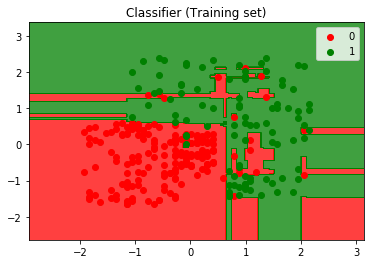

In [25]:
#Visualize Training Data
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

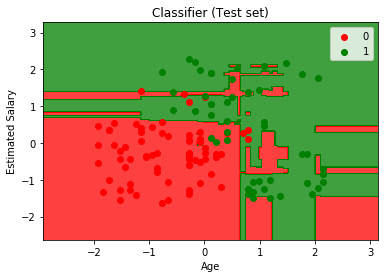

In [26]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()